In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

# 1. Loading the simulation results generated from MATLAB

In [2]:
results = h5py.File('results.mat','r')
results.keys()

<KeysViewHDF5 ['#refs#', '#subsystem#', 'A', 'L', 'L_i', 'b', 'ell', 'ell_i', 'epsilon_vals', 'func_values_reset', 'func_values_reset_raw', 'function_values', 'function_values_ideal', 'gamma', 'gamma_ell', 'grad_fun', 'grad_values', 'grad_values_ideal', 'i', 'inits', 'itrs', 'max_iter', 'max_resets', 'n', 'n_k', 'n_x', 'noise_bound', 'obj_fun', 'offset', 'opt_val', 'opt_x_min', 'options', 'p', 'r', 'r_max', 'reset_counts', 'resets', 's', 'x_gaps', 'x_gaps_ideal', 'x_init', 'x_inits', 'x_min_0']>

In [3]:
function_values = np.array(results['function_values'])
grad_values = np.array(results['grad_values'])
x_gaps = np.array(results['x_gaps'])
itrs = np.array(results['itrs'])
epsilon_vals = np.array(results['epsilon_vals']).flatten()
func_values_reset = np.array(results['func_values_reset'])
function_values_ideal = np.array(results['function_values_ideal'])
reset_counts = np.array(results['reset_counts'])

max_resets = int(results['max_resets'][0][0])
opt_val = results['opt_val'][0][0]
s = int(results['s'][0][0])

# 2. Plot Results corresponds to Figure 1-(a) of the paper

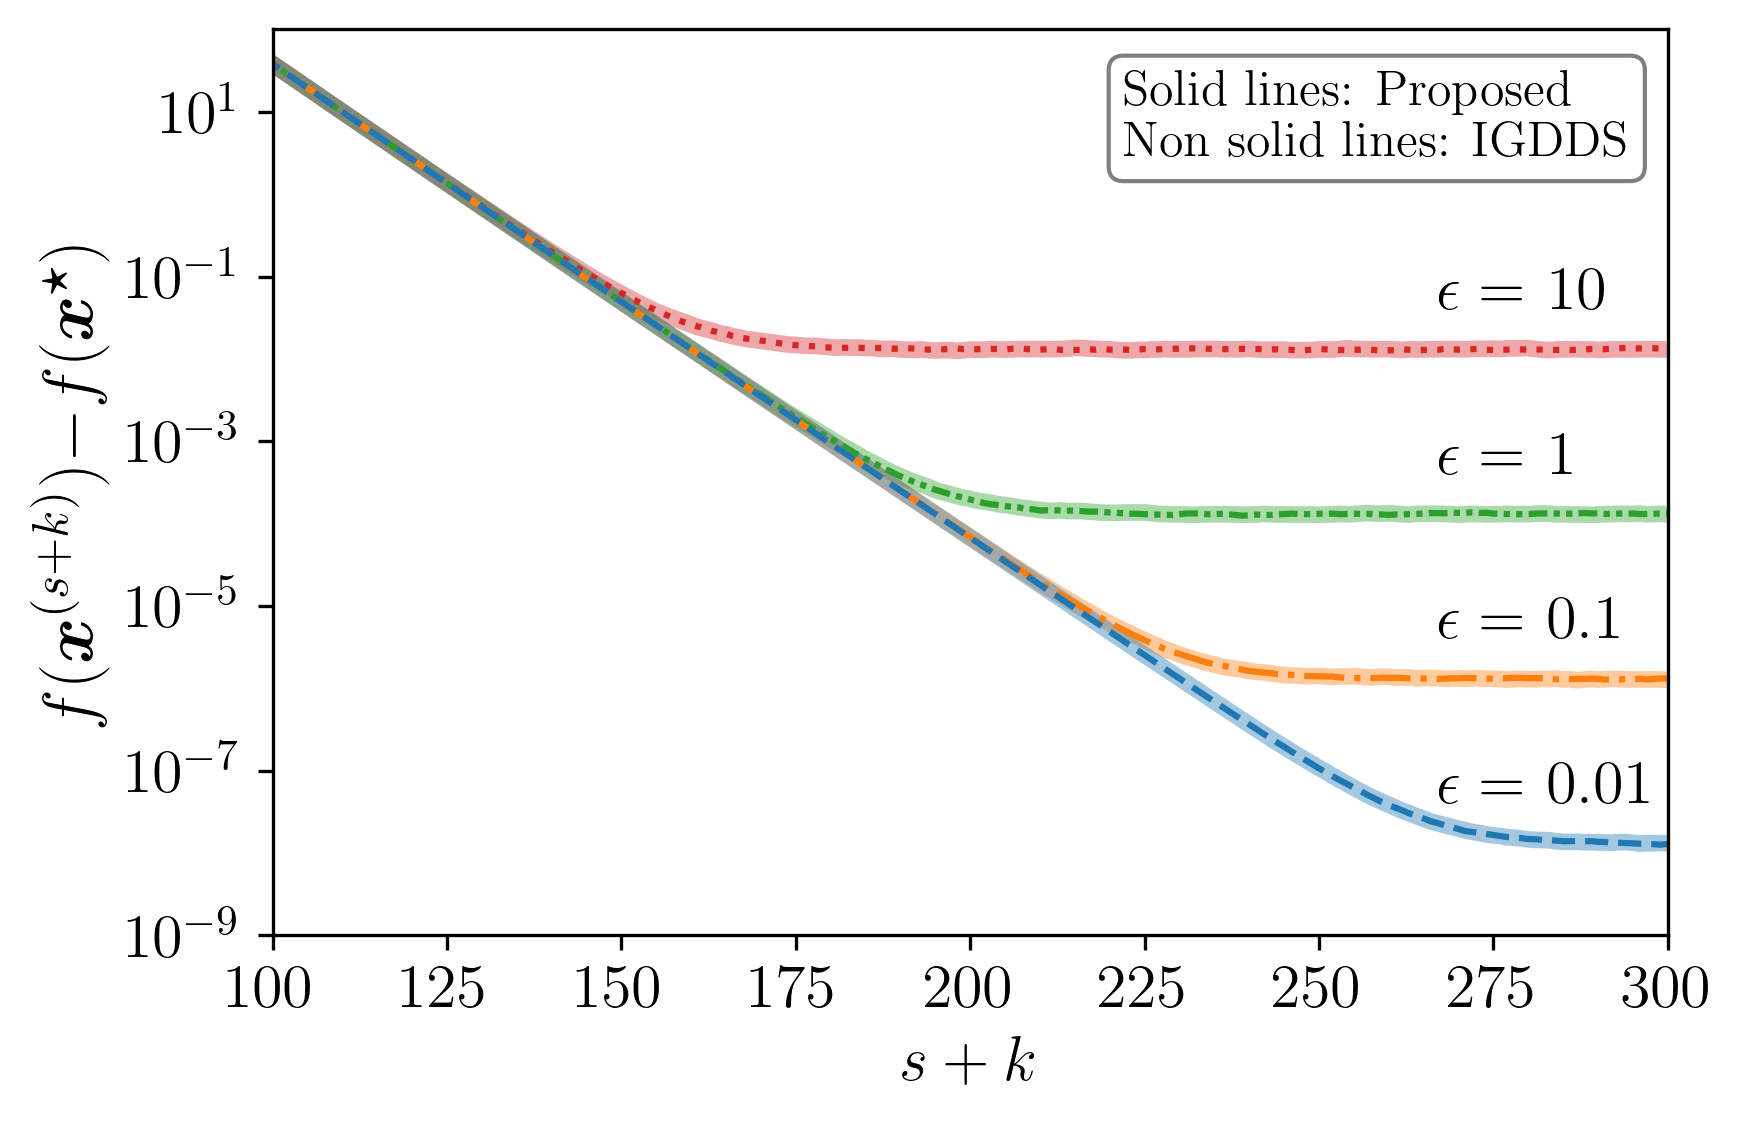

In [4]:
ss = 1
plt.figure(dpi = 300)
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
plt.rcParams['font.family'] = 'sans'
plt.rcParams['text.usetex'] = True

line_styles = ['--', '-.', (0, (3, 1, 1, 1, 1, 1)), ':']

legendStrings = []
for i in range(len(epsilon_vals)-1,-1,-1):
    plt.semilogy(itrs[:500],function_values[i,ss-1,:500] - opt_val, color = colors[i], alpha = 0.4, linewidth = 4)
    legendStrings.append('$\epsilon = $ ' + '$10^{' + str(int(np.log10(epsilon_vals[i]))) +'}$' + ' (Proposed)')

for i in range(len(epsilon_vals)-1,-1,-1):
    plt.semilogy(itrs[:500],function_values[s+i,ss-1,:500] - opt_val, linestyle = line_styles[i] , color = colors[i])
    legendStrings.append('$\epsilon = $ ' + '$10^{' + str(int(np.log10(epsilon_vals[i]))) +'}$' + ' (IGDDS)')


plt.ylabel('$f$(\\mbox{\\boldmath$x$}$^{(s+k)}$)$-$' + '$f$(\\mbox{\\boldmath$x^{\star}$})',fontsize=17)
plt.xlabel('$s+k$', fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim(pow(10,-9), pow(10,2))
plt.xlim(100,300)
plt.text(267, 10**(-1.4), r'$\epsilon = $' + ' $10$',
         fontsize=15)
plt.text(267, 10**(-3.4), r'$\epsilon = $' + ' $1$',
         fontsize=15)
plt.text(267, 10**(-5.4), r'$\epsilon = $' + ' $0.1$',
         fontsize=15)
plt.text(267, 10**(-7.4), r'$\epsilon = $' + ' $0.01$',
         fontsize=15)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

plt.text(222, 10**(1.5), 'Solid lines: Proposed\nNon solid lines: IGDDS', fontsize=12,
        verticalalignment='top', bbox=props)
plt.savefig('Comparison of convergence - function value.png', dpi = 300, bbox_inches='tight')
plt.show()

# 2. Plot Results corresponds to Figure 1-(b) of the paper

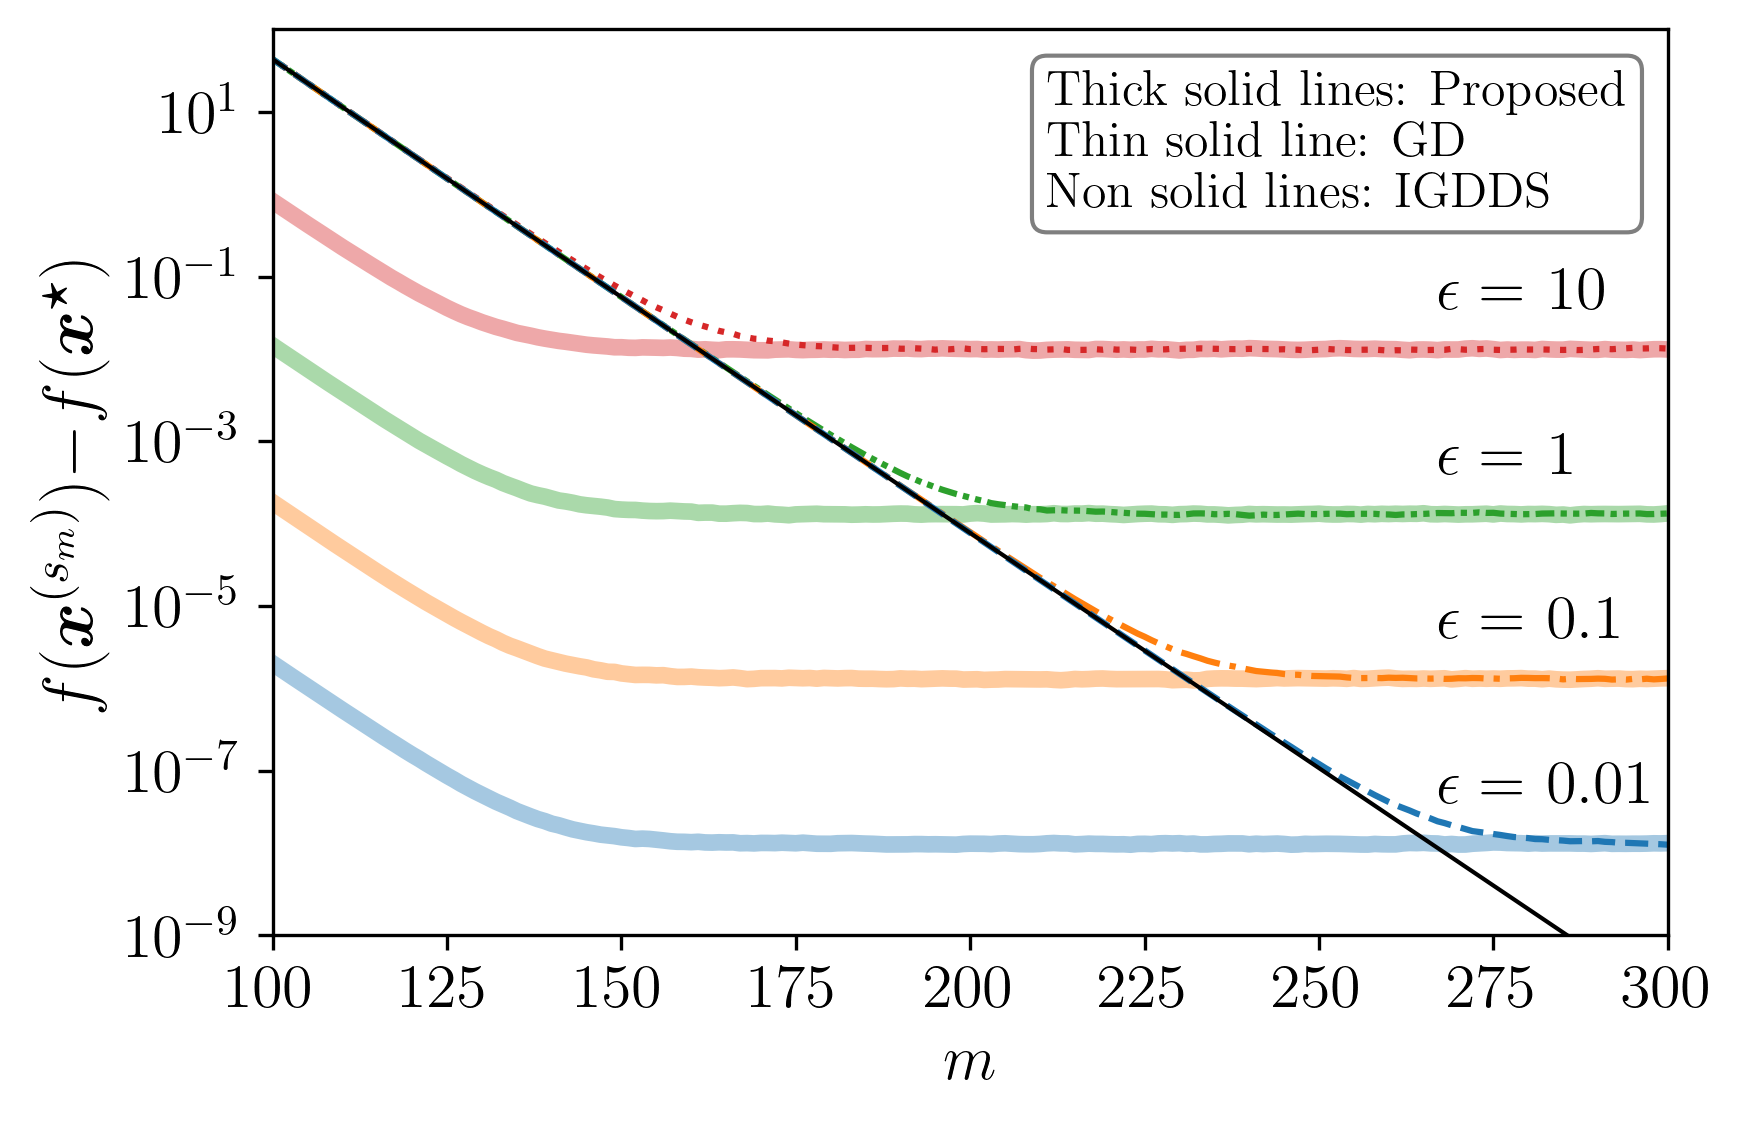

In [5]:
ss = 1
int_syncs = range(1, max_resets+1)
ideal_itrs = range(1,301)
plt.figure(dpi = 300)
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
plt.rcParams['font.family'] = 'sans'
plt.rcParams['text.usetex'] = True

line_styles = ['--', '-.', (0, (3, 1, 1, 1, 1, 1)), ':']

legendStrings = []
for i in range(len(epsilon_vals)-1,-1,-1):
    plt.semilogy(int_syncs,func_values_reset[i,:] - opt_val, color = colors[i], alpha = 0.4, linewidth = 4)
    legendStrings.append('$\epsilon = $ ' + '$10^{' + str(int(np.log10(epsilon_vals[i]))) +'}$' + ' (Proposed)')

for i in range(len(epsilon_vals)-1,-1,-1):
    plt.semilogy(int_syncs,func_values_reset[s+i,:] - opt_val, linestyle = line_styles[i], color = colors[i])
    legendStrings.append('$\epsilon = $ ' + '$10^{' + str(int(np.log10(epsilon_vals[i]))) +'}$' + ' (IGDDS)')

plt.semilogy(ideal_itrs,function_values_ideal[0,0:300] - opt_val, color = 'k', alpha = 1, linewidth = 1)

plt.ylabel('$f$(\\mbox{\\boldmath$x$}$^{(s_{m})}$)$-$' + '$f$(\\mbox{\\boldmath$x^{\star}$})',fontsize=17)
plt.xlabel('$m$', fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim(pow(10,-9), pow(10,2))
plt.xlim(100,300)
plt.text(267, 10**(-1.4), r'$\epsilon = $' + ' $10$',
         fontsize=15)
plt.text(267, 10**(-3.4), r'$\epsilon = $' + ' $1$',
         fontsize=15)
plt.text(267, 10**(-5.4), r'$\epsilon = $' + ' $0.1$',
         fontsize=15)
plt.text(267, 10**(-7.4), r'$\epsilon = $' + ' $0.01$',
         fontsize=15)
# plt.legend(legendStrings,ncol = 2,loc = 'upper right',prop={'size': 10})
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(211, 10**(1.5), 'Thick solid lines: Proposed\nThin solid line: GD\nNon solid lines: IGDDS', fontsize=12,
        verticalalignment='top', bbox=props)
plt.savefig('Comparison of convergence - at intsync steps.png',bbox_inches='tight', dpi = 300)
plt.show()